In [403]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import time
import pandas as pd
import cx_Oracle

from datetime import datetime, timedelta

from IPython import display
#import voila
#import plotly

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [404]:
con = cx_Oracle.connect('bike/12345@192.168.0.78:1521/xe')
cur = con.cursor()

In [218]:
cur.execute("""select m.mem_no as mem_no,r.riding_dt as riding_dt, round(2.3*m.weight*(r.riding_time*0.0667),2) as cal 
            from riding r join member2 m on r.mem_no=m.mem_no""")

columns = ['mem_no','riding_dt','calorie']
calorie_data = pd.DataFrame(cur,columns = columns)

#calorie_data

In [474]:
# def plt_cal_update2(ax):
#     cur.execute("select * from riding where mem_no = '1' order by riding_dt")

#     columns = ['mem_no','distance','calorie','riding_time','riding_dt']
#     riding_data2 = pd.DataFrame(cur,columns=columns)

#     riding_data2['calorie'] = calorie_data['calorie']

#     riding_data2.head()

#     riding_new_d = riding_data2.sort_values(by='riding_dt', ascending=False).head(7)
#     riding_new_d
    
#     ax.plot(riding_new_d['riding_dt'],riding_new_d['calorie'], 'yo--')
#     #ax.xaxis.set_major_locator(dates.DayLocator())
    
#     hdisplay.update(fig)

### 내 데이터

In [ ]:
def plt_cal_update(ax):

    cur.execute("select * from riding where mem_no = '1' order by riding_dt")

    columns = ['mem_no','distance','calorie','riding_time','riding_dt']
    riding_data = pd.DataFrame(cur,columns=columns)

    riding_data['calorie'] = calorie_data['calorie']
    
    ax.plot(riding_data['riding_dt'],riding_data['calorie'], 'yo--')
    

hdisplay.update(fig)

### 상위10%

In [475]:
def week_col(time = riding_data['riding_dt'].max()):
    start=time-timedelta(days=int(time.weekday()))
    week=pd.date_range(start,periods=7)
    return week.astype(str).to_list()

In [477]:
cur_time = con.cursor()

In [544]:
a=cur_time.execute("""select max(riding_dt) from riding """).fetchall()[0][0]

In [478]:
week_col(pd.to_datetime(cur_time.execute("""select max(riding_dt) from riding """).fetchall()[0][0]))

['2023-02-27',
 '2023-02-28',
 '2023-03-01',
 '2023-03-02',
 '2023-03-03',
 '2023-03-04',
 '2023-03-05']

In [545]:
def plt_cal_avg_update_10(ax):

    cur.execute("""select riding_dt,round(sum(distance)/(select ceil(count(distinct(mem_no))*0.1) from riding),2) as avg from riding where mem_no in (select mem_no from 
    (select sum(distance) sum, mem_no from riding where riding_dt 
    between :start_day and :end_day group by mem_no order by sum desc) 
    where rownum<= (select ceil(count(distinct(mem_no))*0.1) from riding)) group by riding_dt order by riding_dt                    """,(week_col(a)[0],week_col(a)[6]))

    columns = ['date','avg']
    data = pd.DataFrame(cur,columns = columns)
    return data

In [546]:
plt_cal_avg_update_10(ax)

,date,avg
0,2023-01-01,0.0
1,2023-01-02,0.0
2,2023-01-03,59.8
3,2023-01-04,60.9
4,2023-01-05,18.8
5,2023-01-06,0.0
6,2023-01-07,0.0
7,2023-01-08,22.2
8,2023-01-09,23.8
9,2023-01-10,65.8


### 평균

In [155]:
def plt_cal_avg_update(ax):
    # 일별로 칼로리 총 평균
    cur.execute("""select r.riding_dt as riding_dt, avg(round(2.3*m.weight*(r.riding_time*0.0667),2)) as avg_cal
                    from riding r join member2 m on r.mem_no=m.mem_no
                    group by r.riding_dt
                    order by r.riding_dt
                    """)

    columns = ['riding_dt','avg_calorie']
    calorie_avg_data = pd.DataFrame(cur,columns = columns)
    calorie_avg_data['avg_calorie'] = round(calorie_avg_data['avg_calorie'],2)

    ax.plot(calorie_avg_data['riding_dt'],calorie_avg_data['avg_calorie'], 'ro-')
  
    hdisplay.update(fig)

In [239]:
# cur.execute("""select r.riding_dt as riding_dt, avg(round(2.3*m.weight*(r.riding_time*0.0667),2)) as avg_cal
#                         from riding r join member2 m on r.mem_no=m.mem_no
#                         group by r.riding_dt
#                         order by r.riding_dt
#                         """)

# columns = ['riding_dt','avg_calorie']
# calorie_avg_data = pd.DataFrame(cur,columns = columns)
# calorie_avg_data['avg_calorie'] = round(calorie_avg_data['avg_calorie'],2)

# riding_new_d2 = calorie_avg_data.sort_values(by='riding_dt', ascending=False).head(7)
# riding_new_d2

In [283]:
def plt_cal_avg_update2(ax):
    # 일별로 칼로리 총 평균
    cur.execute("""select r.riding_dt as riding_dt, avg(round(2.3*m.weight*(r.riding_time*0.0667),2)) as avg_cal
                        from riding r join member2 m on r.mem_no=m.mem_no
                        group by r.riding_dt
                        order by r.riding_dt
                        """)

    columns = ['riding_dt','avg_calorie']
    calorie_avg_data = pd.DataFrame(cur,columns = columns)
    calorie_avg_data['avg_calorie'] = round(calorie_avg_data['avg_calorie'],2)

    riding_new_d = calorie_avg_data.sort_values(by='riding_dt', ascending=False).head(7)
    riding_new_d
    
    ax.plot(riding_new_d['riding_dt'],riding_new_d['avg_calorie'], 'ro--')
    #ax.xaxis.set_major_locator(dates.DayLocator())
     
    hdisplay.update(fig)

In [287]:
riding_new_d

,mem_no,distance,calorie,riding_time,riding_dt
36,1,80.9,1128.44,183,2023-02-06
35,1,0.0,786.49,0,2023-02-05
34,1,100.8,2279.67,482,2023-02-04
33,1,70.3,786.49,288,2023-02-03
32,1,60.3,626.91,250,2023-02-02
31,1,46.5,1823.74,160,2023-02-01
30,1,25.0,424.95,50,2023-01-31


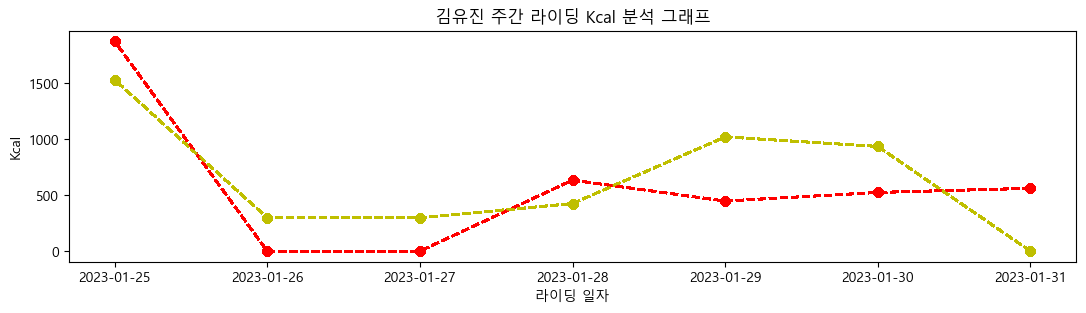

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023C8720C1F0> (for post_execute):


KeyboardInterrupt: 

In [537]:
import matplotlib.pyplot as plt
from matplotlib import dates

fig,ax = plt.subplots(1,1)
hdisplay = display.display("", display_id=True)

# total_len = len(riding_new_d.index)
# plt.xticks(np.arange(0, total_len +1))
plt.xticks()

plt.title('김유진 주간 라이딩 Kcal 분석 그래프')
plt.rcParams['figure.figsize'] = (13,3)

ax.set_xlabel('라이딩 일자')
ax.set_ylabel('Kcal')

# plt_update(ax)
for f in range(100000):
    plt_cal_update2(ax)
    plt_cal_avg_update2(ax)
        
    time.sleep(1)

plt.close()

### 월간 Kcal 분석

In [470]:
# def plt_cal_year_update(ax):
    
#     cur.execute("""select m.mem_no as mem_no,r.riding_dt as riding_dt, round(2.3*m.weight*(r.riding_time*0.0667),2) as cal 
#             from riding r join member2 m on r.mem_no=m.mem_no""")

#     columns = ['mem_no','riding_dt','calorie']
#     calorie_data = pd.DataFrame(cur,columns = columns)
    
#     calorie_data['month'] = ""
#     calorie_data['month'] = calorie_data['riding_dt'].dt.month
    
#     calorie_year_data = calorie_data[(calorie_data['month'] == 1)]
    
#     return calorie_year_data

In [472]:
# a = plt_cal_year_update(ax)
# print(a)

In [530]:
def plt_cal_year_input():
    
    ## 나의 데이터
    cur.execute("""select m.mem_no as mem_no,r.riding_dt as riding_dt, round(2.3*m.weight*(r.riding_time*0.0667),2) as cal 
            from riding r join member2 m on r.mem_no=m.mem_no""")

    columns = ['mem_no','riding_dt','calorie']
    calorie_year_data = pd.DataFrame(cur,columns = columns)
    
    calorie_year_data['month'] = ""
    calorie_year_data['month'] = calorie_year_data['riding_dt'].dt.month
      
    m = int(input("월 입력: "))

    return calorie_year_data[calorie_year_data['month']==m]

월 입력: 1
   mem_no  riding_dt  calorie  month
0       1 2023-01-01   212.47      1
1       1 2023-01-02     0.00      1
2       1 2023-01-03   662.92      1
3       1 2023-01-04    84.99      1
4       1 2023-01-05  1317.33      1
..    ...        ...      ...    ...
88      3 2023-01-27     0.00      1
89      3 2023-01-28   688.96      1
90      3 2023-01-29   543.52      1
91      3 2023-01-30   558.83      1
92      3 2023-01-31   574.14      1

[93 rows x 4 columns]


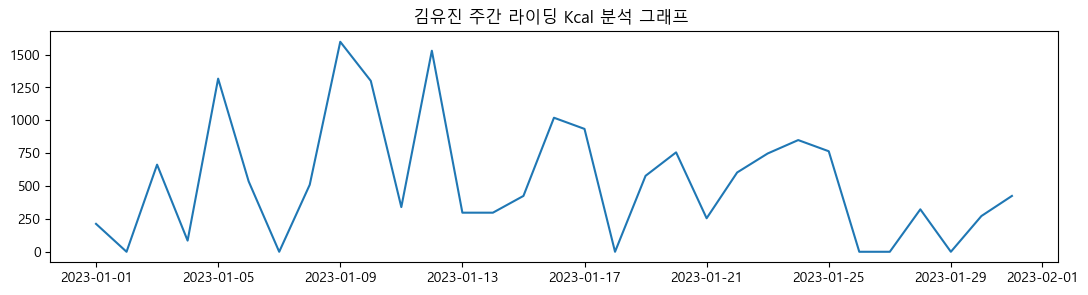

In [536]:
p = plt_cal_year_input()
print(p)
p_1 = p[p['mem_no'] == '1']
plt.title('김유진 주간 라이딩 Kcal 분석 그래프 ')
plt.plot(p_1['riding_dt'],p_1['calorie'])

plt.show()